考虑一个电容器的恒流充放电过程，其充放电电流大小为$I$，活性物质的质量为$m$，充放电的电压范围为$[V_1,V_2]$。假设在一次循环中，其比电容为$C_p$，充电
时间和放电时间分别为$t_1,t_2$，则

$$ \left \{
    \begin{aligned}
    &Q_{charge}=I \times t_1 \\ 
    \\
    &Q_{dischage}=I \times t_2\\ 
    \end{aligned}
    \right.$$

库仑效率

$$\eta=\frac{Q_{dischage}}{Q_{charge}}=\frac{t_2}{t_1}$$

比电容

$$C_p=\frac{Q_{discharge}}{m \times (V_2-V_1)}=\frac{I \times t_2}{m \times (V_2-V_1)}=\frac{i\times t_2}{V_2-V_1}$$

其中$i=I/m$为比电流。

[0.16989660868079398, 0.17696904455418258]
平均充电比电容Cp= 92.71601944606496 F/g
平均放电比电容Cp= 107.00430020557269 F/g
平均电容保持率 98.14676916869722 %
平均库仑效率 17.343282661748827 %
[1, 2]
[383.108, 1617.055]
[1050.282, 2233.877]
[1617.035, 2779.669]
[1.1999, 1.2]
[94.4667055587966, 90.96533333333332]
[0.16989660868079398, 0.17696904455418258]
[1.0, 0.9629353833739442]
[111.20493374447871, 102.80366666666666]


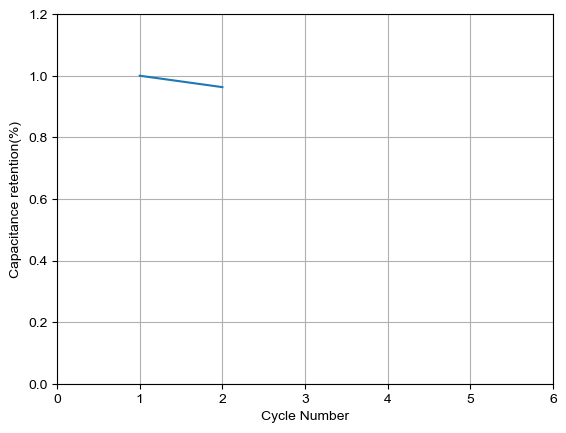

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# 将画图部分的字体统一为Arial
from matplotlib import rcParams
config = {
    "font.family":'Arial',  # 设置字体类型
    "axes.unicode_minus": False #解决负号无法显示的问题
}
rcParams.update(config)

# GCD.txt的数据具有多列，每一列数据的意义如下：
# Time/sec, Potential/V, Step, Cycle, Current/A, ChargeCapacity(Ah), DischargeCapacity(Ah), ChargeEnergy(Wh), DischargeEnergy(Wh), dV/dt(V/s)
# 每个step代表一个充电或放电过程，因此可以根据step来对数据进行分组。
# coordinates列表将包含前四列数据。

# specific_current为比电流，单位为A/g
specific_current = 0.2
coordinates = []

with open('GCD.txt', 'r') as file:
    for line in file:
        # 移除行末的换行符并使用逗号分隔符分割行
        parts = line.strip().split(',')
        
        # 确保每行包含的数据量正确
        if len(parts) == 10:
            # 将前四个数据转换为浮点数，并创建坐标点
            try:
                time = float(parts[0])
                potential = float(parts[1])
                step = float(parts[2])
                cycle = float(parts[3])
                coordinate = (time, potential, step, cycle)
                coordinates.append(coordinate)
            except ValueError:
                print(f"无法解析行：{line}")

# 创建一个矩阵用来存储数据，这个矩阵具有5行，
# 第一行是cycle的值，第二行是这个cycle中time的最小值，
# 第三行是这个cycle中potential达到最大值时的time值，
# 第四行是这个cycle中time的最大值，第五行是这个cycle中Potential的最值的差
# 行数a = 5，列数rows是cycle的数量
a = 5 
rows = int(max(coordinate[3] for coordinate in coordinates))
matrix = [[0 for i in range(rows)] for j in range(a)]
for i in range(rows):
    matrix[0][i] = i + 1


# 创建一个字典用于存储每个不同step值对应的最大和最小time值
cycle_time_data = {}

# 遍历coordinates列表
for coordinate in coordinates:
    cycle_value = coordinate[3]
    time_value = coordinate[0]

    if cycle_value not in cycle_time_data:
        # 如果step值不在字典中，添加一个新的条目
        cycle_time_data[cycle_value] = {'max_time': time_value, 'min_time': time_value}
    else:
        # 更新字典中的max_time和min_time值
        cycle_time_data[cycle_value]['max_time'] = max(cycle_time_data[cycle_value]['max_time'], time_value)
        cycle_time_data[cycle_value]['min_time'] = min(cycle_time_data[cycle_value]['min_time'], time_value)

# 遍历字典并输出结果
for cycle_value, time_values in cycle_time_data.items():
    max_time = time_values['max_time']
    min_time = time_values['min_time']
    for i in range(rows):
        if cycle_value ==  matrix[0][i]:
            matrix[1][i] = min_time
            matrix[3][i] = max_time

# 创建一个字典用于存储cycle值对应的time和potential
cycle_time_potential = {}  

# 遍历coordinates列表
for coordinate in coordinates:
    cycle_value = coordinate[3]
    time_value = coordinate[0]
    potential_value = coordinate[1]

    if cycle_value not in cycle_time_potential:
        # 如果cycle值不在字典中，添加一个新的条目
        cycle_time_potential[cycle_value] = {'time': time_value, 'potential': potential_value}
    else:
        # 检查当前potential是否大于字典中的potential
        if potential_value > cycle_time_potential[cycle_value]['potential']:
            cycle_time_potential[cycle_value] = {'time': time_value, 'potential': potential_value}

# 遍历字典并输出结果
for cycle_value, values in cycle_time_potential.items():
    max_potential_time = values['time']
    max_potential = values['potential']
    for i in range(rows):
        if cycle_value ==  matrix[0][i]:
            matrix[2][i] = max_potential_time

# 创建一个字典用于存储cycle值对应的potential的最大值和最小值
cycle_potential = {}  

# 遍历coordinates列表
for coordinate in coordinates:
    cycle_value = coordinate[3]
    potential_value = coordinate[1]

    if cycle_value not in cycle_potential:
        # 如果cycle值不在字典中，添加一个新的条目
        cycle_potential[cycle_value] = {'max_potential': potential_value, 'min_potential': potential_value}
    else:
        # 检查当前potential是否大于字典中的max_potential
        if potential_value > cycle_potential[cycle_value]['max_potential']:
            cycle_potential[cycle_value]['max_potential'] = potential_value
        # 检查当前potential是否小于字典中的min_potential
        if potential_value < cycle_potential[cycle_value]['min_potential']:
            cycle_potential[cycle_value]['min_potential'] = potential_value

# 计算并输出差值
cycle_differences = {}  # 存储每个cycle的最大和最小potential差值
for cycle_value, values in cycle_potential.items():
    max_potential = values['max_potential']
    min_potential = values['min_potential']
    difference = max_potential - min_potential
    cycle_differences[cycle_value] = difference

# 遍历差值字典并输出结果
for cycle_value, difference in cycle_differences.items():
    for i in range(rows):
        if cycle_value ==  matrix[0][i]:
            matrix[4][i] = difference

matrix = [row[1:-1] for row in matrix]
matrix[0] = [x - 1 for x in matrix[0]]

# 计算比电容，为矩阵的第六行
Cp = []

for col_index in range(len(matrix[0])):
    numerator = matrix[3][col_index] - matrix[2][col_index]
    denominator = matrix[4][col_index]
    
    # 防止除以0错误
    if denominator != 0:
        result = specific_current * numerator / denominator
    else:
        result = None
    
    # 添加结果到新行
    Cp.append(result)

matrix.append(Cp)

CE = []

for col_index in range(len(matrix[0])):
    numerator = matrix[3][col_index] - matrix[2][col_index]
    denominator = matrix[2][col_index] - matrix[1][col_index]
    
    # 防止除以0错误
    if denominator != 0:
        result = specific_current * numerator / denominator
    else:
        result = None
    
    # 添加结果到新行
    CE.append(result)

print(CE)
matrix.append(CE)

# 计算平均放电比电容
Cp_average = sum(matrix[5])/len(matrix[5])


#计算电容保持率，作为第八行，计算平均电容保持率
row_index = 5
row_to_modify = matrix[row_index]
first_element = row_to_modify[0]
CR = [x / first_element for x in row_to_modify]
matrix.append(CR)

CR_average = 100*sum(matrix[7])/len(matrix[7])



#计算平均库仑效率
CE_average = 100*sum(matrix[6])/len(matrix[6])


#计算充电比电容与平均充电比电容
Cpn = []

for col_index in range(len(matrix[0])):
    numerator = matrix[2][col_index] - matrix[1][col_index]
    denominator = matrix[4][col_index]
    
    # 防止除以0错误
    if denominator != 0:
        result = specific_current * numerator / denominator
    else:
        result = None
    
    # 添加结果到新行
    Cpn.append(result)

matrix.append(Cpn)

Cpn_average = sum(matrix[8])/len(matrix[8])

print("平均充电比电容Cp=", Cp_average, "F/g")
print("平均放电比电容Cp=", Cpn_average, "F/g")
print("平均电容保持率", CR_average, "%")
print("平均库仑效率", CE_average, "%")



# 打印更新后的矩阵，包括新行
for row in matrix:
    print(row)



# 输出电容保持率的图
plt.plot(matrix[0], matrix[7])

# 添加标签和标题
plt.xlabel('Cycle Number')
plt.ylabel('Capacitance retention(%)')
plt.title('')
plt.xlim((0, 6))
plt.ylim((0, 1.2))
# 显示网格
plt.grid(True)

# 显示图形
plt.show()

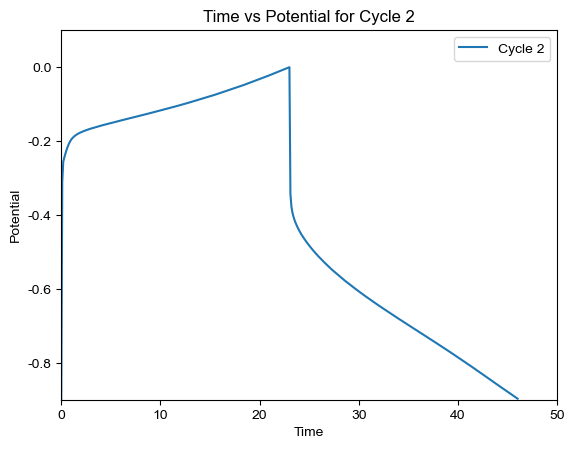

In [4]:
# 画第二个周期的充放电曲线

cycle_2_coordinates = [coord for coord in coordinates if coord[3] == 2]

time_list = [coord[0] for coord in cycle_2_coordinates]
potential_list = [coord[1] for coord in cycle_2_coordinates]

# 让time的每个值都减去第一个值
first_time_value = time_list[0]
time_list = [time - first_time_value for time in time_list]
# 绘制图表
plt.plot(time_list, potential_list, label='Cycle 2')
plt.xlabel('Time')
plt.ylabel('Potential')
plt.xlim((0, 50))
plt.ylim((-0.9, 0.1))
plt.title('Time vs Potential for Cycle 2')
plt.legend()
plt.show()